In [ ]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns  
sns.set(style="whitegrid")

In [2]:
df_raw = pd.read_csv('../artifacts/raw.csv')

In [3]:
df = df_raw.sample(random_state=2, n= 175000)

In [4]:
class DataFrame_Information():
    def __init__(self):
        self.df = df
        self.df_raw = df_raw
    def base_info(self):
        print('-------THE SHAPE OF THE DATASET IS-------')
        print(self.df.shape)
        print()
        print('-------TOTAL NUMBER OF COLUMNS-------')
        print(self.df.shape[-1])
        print()
        print('-------TOTAL NUMBER OF ROWS IN TESTING DATASET')
        print(self.df.shape[0])
        print()
        print('TOTAL NUMBER OF COLUMNS IN REAL DATASET')
        print(self.df_raw.shape[-1])
        print('-------TOTAL NUMBER OF ROWS IN REAL DATASET')
        print(self.df_raw.shape[0])
        print('='*45)
        print('------THE COLUMNS IN TESTING DATASET-------')
        print(self.df.columns)
        print()
        print('='*45)
        print('-------CATEGORICAL COLUMNS IN THE DATASET-------')
        categorical_columns = self.df.select_dtypes(include=['object']).columns.tolist()
        print(categorical_columns)
        print()
        print('='*45) 
        print('-------NUMERICAL COLUMNS IN THE DATASET-------')
        numerical_columns = self.df.select_dtypes(include=['number']).columns.tolist()
        print(numerical_columns)
        print()
        print('='*45)
        print('-------THE DATATYPE OF COLUMNS IS-------')
        print(self.df.info())

In [5]:
ig = DataFrame_Information()
ig.base_info()

-------THE SHAPE OF THE DATASET IS-------
(175000, 26)

-------TOTAL NUMBER OF COLUMNS-------
26

-------TOTAL NUMBER OF ROWS IN TESTING DATASET
175000

TOTAL NUMBER OF COLUMNS IN REAL DATASET
26
-------TOTAL NUMBER OF ROWS IN REAL DATASET
700000
------THE COLUMNS IN TESTING DATASET-------
Index(['id', 'age', 'alcohol_consumption_per_week',
       'physical_activity_minutes_per_week', 'diet_score',
       'sleep_hours_per_day', 'screen_time_hours_per_day', 'bmi',
       'waist_to_hip_ratio', 'systolic_bp', 'diastolic_bp', 'heart_rate',
       'cholesterol_total', 'hdl_cholesterol', 'ldl_cholesterol',
       'triglycerides', 'gender', 'ethnicity', 'education_level',
       'income_level', 'smoking_status', 'employment_status',
       'family_history_diabetes', 'hypertension_history',
       'cardiovascular_history', 'diagnosed_diabetes'],
      dtype='object')

-------CATEGORICAL COLUMNS IN THE DATASET-------
['gender', 'ethnicity', 'education_level', 'income_level', 'smoking_status', '

In [6]:
num_cols = df.select_dtypes(include=['number']).columns.tolist()
cat_cols = df.select_dtypes(include=['object']).columns.tolist()

In [9]:
display(cat_cols)

['gender',
 'ethnicity',
 'education_level',
 'income_level',
 'smoking_status',
 'employment_status']

In [13]:
for col in [
    'gender',
    'ethnicity',
    'education_level',
    'income_level',
    'smoking_status',
    'employment_status'
]:
    print(col, df[col].unique())


gender ['Female' 'Male' 'Other']
ethnicity ['Black' 'Other' 'White' 'Asian' 'Hispanic']
education_level ['Postgraduate' 'Graduate' 'Highschool' 'No formal']
income_level ['Lower-Middle' 'Middle' 'Upper-Middle' 'High' 'Low']
smoking_status ['Current' 'Never' 'Former']
employment_status ['Employed' 'Retired' 'Unemployed' 'Student']


In [14]:
gender_map = {'Female': 0, 'Male': 1, 'Other': 2}
ethnicity_map = {'Asian': 0, 'Black': 1, 'Hispanic': 2, 'White': 3, 'Other': 4}
education_level_map = {'No formal': 0, 'Highschool': 1, 'Graduate': 2, 'Postgraduate': 3}
income_level_map = {'Low': 0, 'Lower-Middle': 1, 'Middle': 2, 'Upper-Middle': 3, 'High': 4}
smoking_status_map = {'Never': 0, 'Former': 1, 'Current': 2}
employment_status_map = {'Unemployed': 0, 'Student': 1, 'Employed': 2, 'Retired': 3}

df['gender'] = df['gender'].map(gender_map)
df['ethnicity'] = df['ethnicity'].map(ethnicity_map)
df['education_level'] = df['education_level'].map(education_level_map)
df['income_level'] = df['income_level'].map(income_level_map)
df['smoking_status'] = df['smoking_status'].map(smoking_status_map)
df['employment_status'] = df['employment_status'].map(employment_status_map)


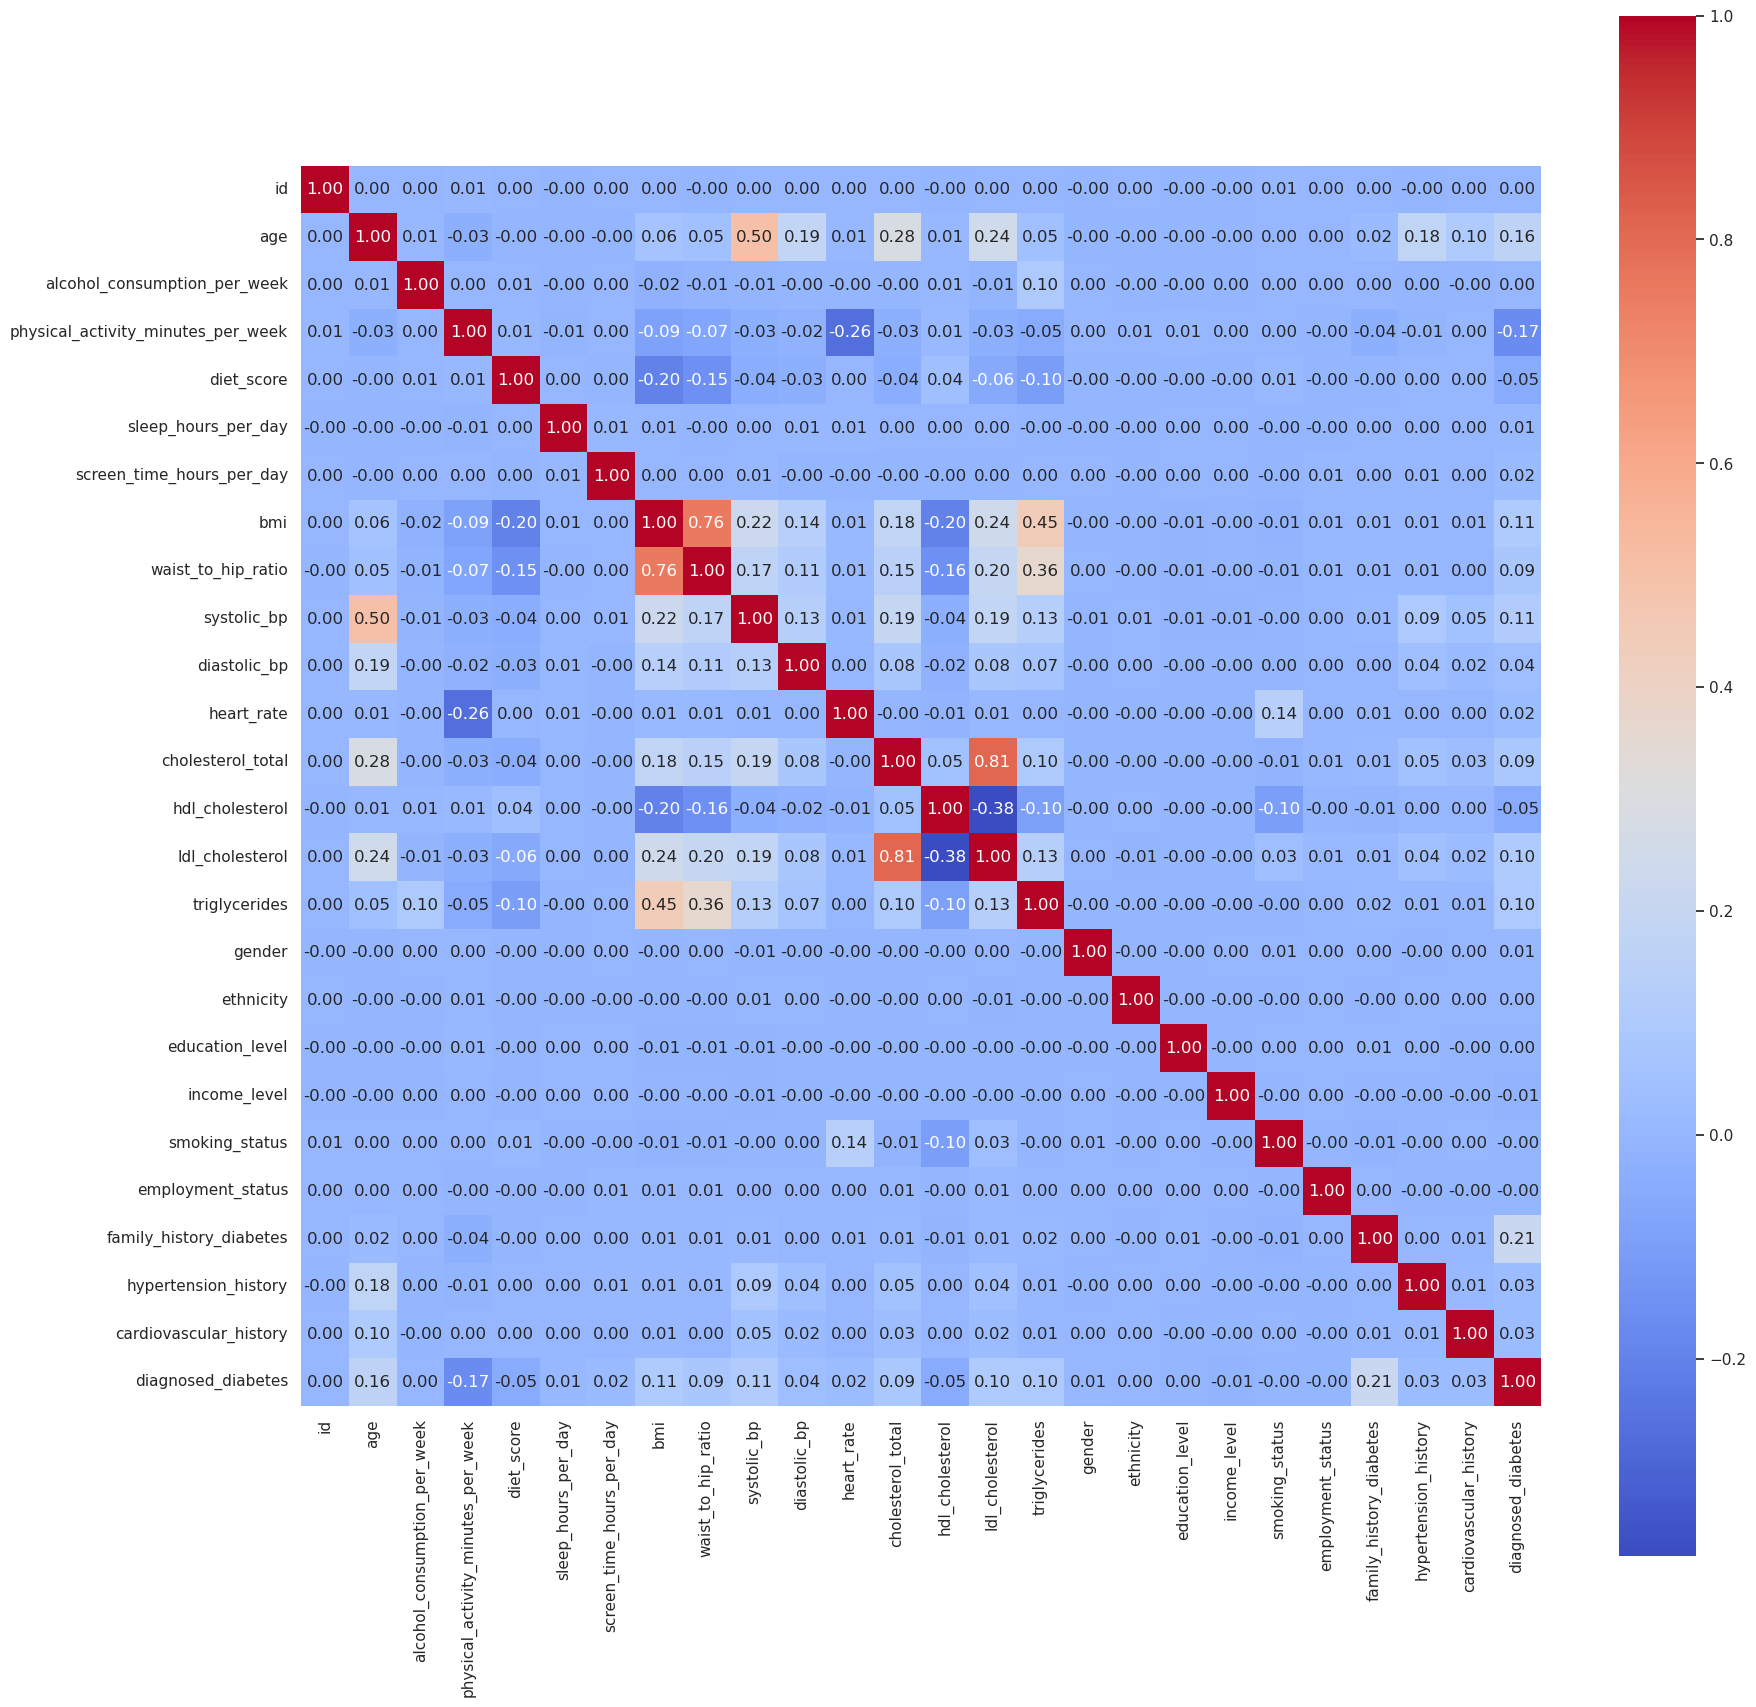

In [17]:
corr = df.corr(numeric_only=True)

plt.figure(figsize=(20, 20))
sns.heatmap(corr, annot=True, fmt=".2f", cmap="coolwarm", square=True)
plt.show()